Authors:
* Benjamí Parellada 
* Clara Rivadulla
# Lab 1 

This practical consists of practicing `nltk` functions and getting familiar with working with a small corpus and stopwords. To do so, we are asked to find the 25 non-stopwords with the most number of occurrences in the file `'blake-poems.txt'` of the Gutenberg corpus.

First, we download the Gutenberg corpus and the list of stopwords. If this was done locally, we could omit this step once it has been downloaded once, and directly import the relevant corpus.


In [ ]:
import re
import nltk
from collections import Counter
import matplotlib.pyplot as plt
nltk.download('gutenberg')
nltk.download('stopwords')

Once we have the data, we reference `'blake-poems.txt'` and filter out the stopwords. To do some further analysis, we return four different processings on the corpus to later be compared:

1. No processing done, just the raw poems as they come.
2. We remove stopwords from the poems.
3. We remove stopwords and every word is converted to lower case.
4. Same as 3, but we remove the symbols as well.


In [23]:
blake = nltk.corpus.gutenberg.words('blake-poems.txt')
stopw = set(nltk.corpus.stopwords.words('english'))
regex = re.compile(r'\W+') # regex of only alphabetical characters


t0 = blake
t1 = [w for w in blake if not w in stopw]
t2 = [w.lower() for w in blake if not w.lower() in stopw]
t3 = [w for w in t2 if not regex.match(w)]

Afterwards, we return the top 25 most common words for each processing.

In [24]:
f0 = Counter(t0).most_common(25)
f1 = Counter(t1).most_common(25)
f2 = Counter(t2).most_common(25)
f3 = Counter(t3).most_common(25)

In [25]:
# make things a bit more pretty
import pandas as pd
from IPython.core.display import HTML

def display_side_by_side(dfs:list, captions:list):
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0" 
    display(HTML(output))

display_side_by_side([pd.DataFrame(f0, columns = ['Word', 'Freq']), 
                     pd.DataFrame(f1, columns = ['Word', 'Freq']),
                     pd.DataFrame(f2, columns = ['Word', 'Freq']),
                     pd.DataFrame(f3, columns = ['Word', 'Freq']),
                     pd.DataFrame([len(set(t0)), len(set(t1)), len(set(t2)), len(set(t3))], columns = ['Words'])],
                     ['No processing done', 'Stopwords removed', 'SW + Lower Case', 'SW + LC + No symbols', 'Number of Unique'])

,Word,Freq
0,",",680
1,the,351
2,.,201
3,And,176
4,and,169
5,of,131
6,I,130
7,in,116
8,a,108
9,',104


Seeing the 4 tables together, we can easily compare the different processing done and how they affected the text. We can see how just leaving the raw input without modifying would not result in good machine learning models, since the most frequent words are those without intrinsic meaning (stopwords: the, and, of, etc.). Once we remove these stopwords (second table) we are once again faced with these words! How can this be? we thought we just removed them. On closer inspection we see that the list of stopwords from `nltk` are all lowercase, so since we are being case-sensitive right now they were not filtered.

Once again, we filter the stopwords from the text, but this time converting them all to lower case first. Which returns us the third table, however, the most frequent "words" now are not words, but symbols which, while important to understand the pacing of a sentence, are not that necessary to understand it. After removing these, we finish our practical with the fourth table, which is the most common words in Blake's poems.

At a first glance, everything seems fine, however there are some weird words appearing on the frequency table. Words like thee, thy, thou, which are archaic English and not used anymore. Moreover, entry 23: `er` is worrisome, since after checking the source material we can see it in a few places. 'Er', per se, is not a word, however in the original text it was always preceded by an apostrophe and more text as such:
- `o'er`, which would mean `over` (12 appearances)
- `where'er`, which would mean `wherever` (2 appearances)
- `what'er`, which would mean `whatever` (1 appearance)
- `ne'er`, which would mean `never` (1 appearance)

Hence, the only logical conclusion we can reach is that Blake did not know how to do a `v`. The second conclusion we can learn from this, is that we should be careful with removing text, as by removing the apostrophe we created a new word which appears to be one of the most frequent, but is incorrect since this word does not even exist and should not be interpreted without the preceding part.

Finally, on the last table, we can see how much the number of unique words decreases, and how from the source material to the third table, we removed a total of 178 stopwords. To achieve the fourth table, we removed a total of 23 non-alphabetic words.



## One step further

In order to ignore the archaic Middle English stopwords that remained after the last processing, we've made a little research and found out that there's a Python library called `cltk` (*The Classical Language Toolkit*) which contains a list with old-English stop words. 

Moreover, `never` is not considered a stopword in the Gutenberg nor cltk stopword lists, hence to correct the problem of finding `ne'er` we add one to the frequency table on the correct spot. While `over` is considered a stopword  and should be removed, and `wherever` and `whatever` aren't. However these two words do not appear in the raw texts, hence correcting them will not change the top 25 non-stopwords list.

In [ ]:
# we install the cltk library and we import the Middle English stopwords list
!pip install "cltk<1.0" 
from cltk.stop.middle_english.stops import STOPS_LIST
STOPS_LIST.append('er')                             # we append 'er' to the list of removable words

In [27]:
t4 = [w for w in t3 if not w.lower() in STOPS_LIST] # we also ignore those stopwords
f4 = Counter(t4)
f4['never'] += 1                                    # we add 1 "ne'er" to never counter
df = pd.DataFrame(f4.most_common(25), columns = ['Word', 'Freq'])
df

,Word,Freq
0,little,45
1,like,35
2,love,29
3,sweet,28
4,night,28
5,joy,25
6,away,24
7,weep,24
8,father,22
9,sleep,21


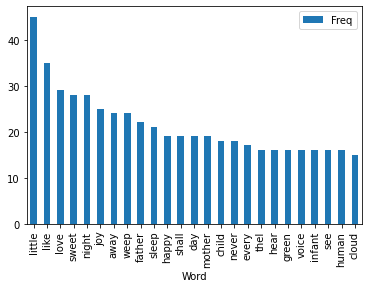

In [28]:
df.plot.bar(x = 'Word', y = 'Freq')

## Final results


In conclusion, **the 25 most frequent non-stopwords in Blake's poems** are the ones shown in the table above: `little, like, love, sweet, night, joy, away, weep, father, sleep, happy, shall, day, mother, child, never, every, thel, hear, green, voice, infant, see, human, cloud`.

Now we can see a bit the themes of Blake's poems through the most common words he uses. We can figure out that he probably compares many things due to his intensive use of `like`, and a great deal of family matters (high frequency: `father, mother, child, infant`) and seem to be more positive emotions (`love, sweet, joy, happy`) than negative (`weep`). With his frequent use of descriptive words (`little, night, away, day, bright, green`) we can infer that he probably used his poems to describe his environment and what he saw.

